### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

### Loading The Data

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploratory Data Analysis

In [4]:
df.shape

(301, 9)

In [5]:
df.describe().round()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.0,301.0,301.0,301.0,301.0
mean,2014.0,5.0,8.0,36947.0,0.0
std,3.0,5.0,9.0,38887.0,0.0
min,2003.0,0.0,0.0,500.0,0.0
25%,2012.0,1.0,1.0,15000.0,0.0
50%,2014.0,4.0,6.0,32000.0,0.0
75%,2016.0,6.0,10.0,48767.0,0.0
max,2018.0,35.0,93.0,500000.0,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df.drop_duplicates(inplace= True)

In [10]:
df.duplicated().sum()

0

### Research Question 1 ( What are the best selling cars? )

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

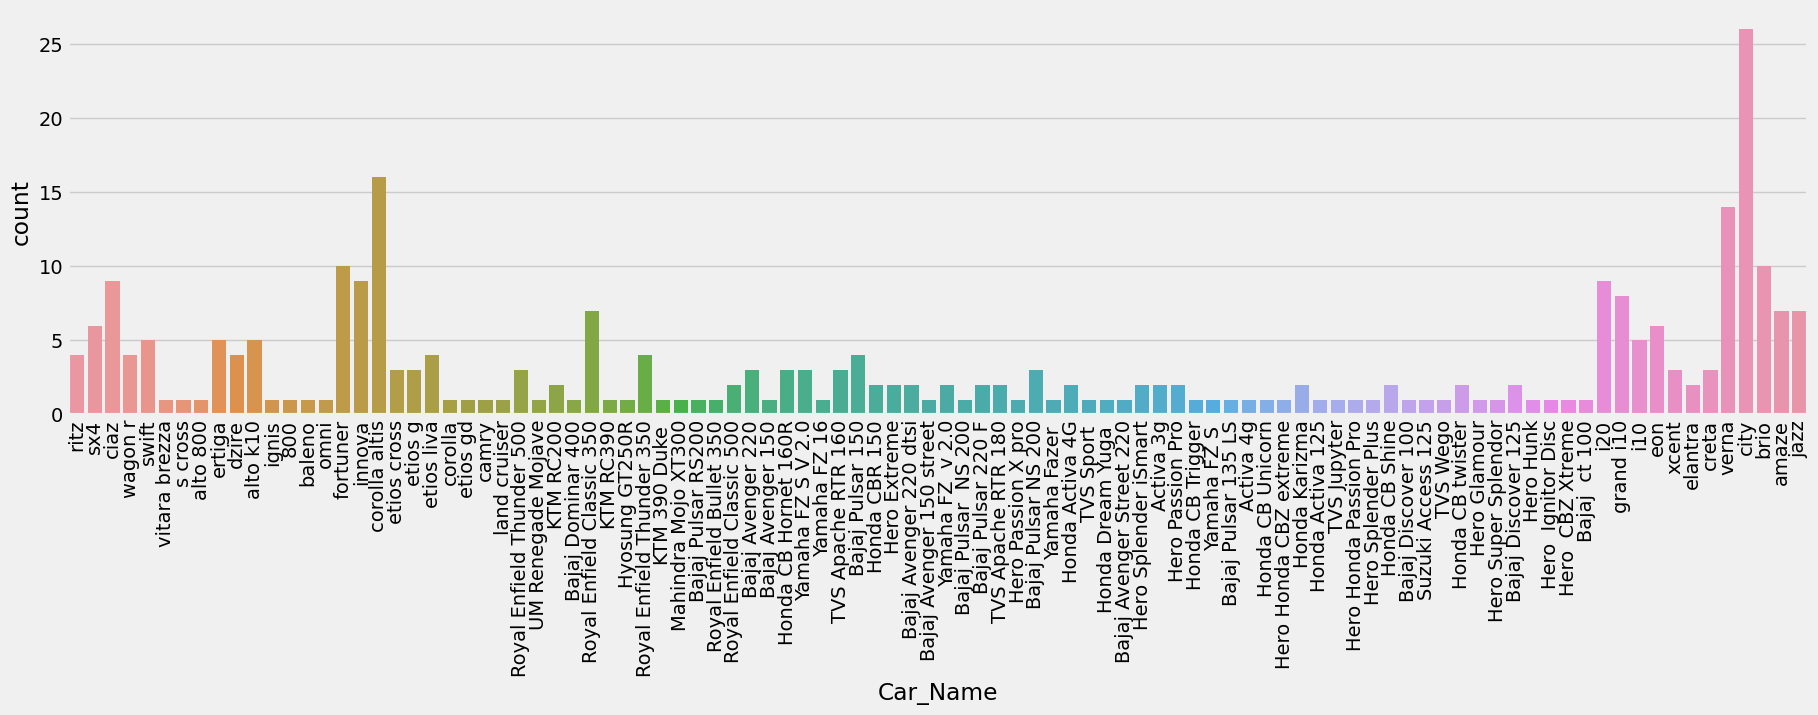

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Car_Name', data = df)
plt.xticks(rotation=90)
plt.show

### Research Question 2 ( What is the number of sales per year? )

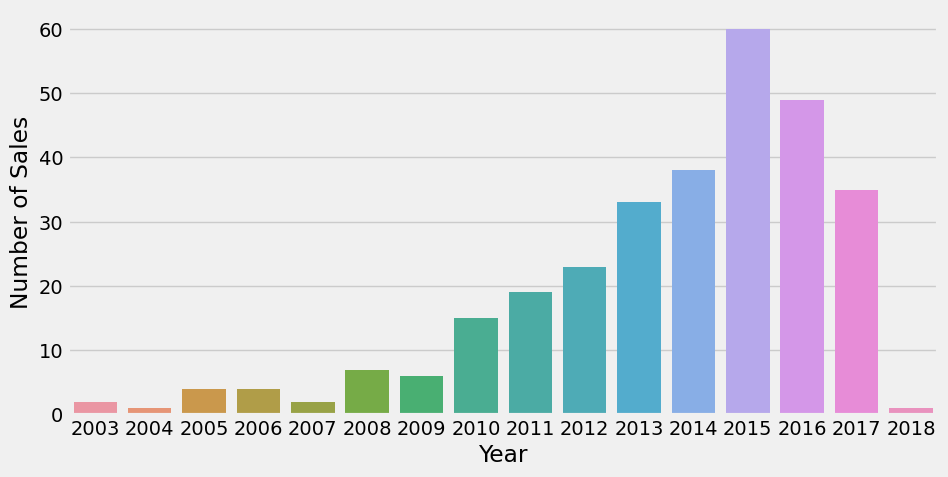

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Year", data= df)
plt.ylabel("Number of Sales");

### Research Question 3 ( What types of gearboxes have the most sales? )

In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<AxesSubplot:xlabel='Transmission', ylabel='count'>

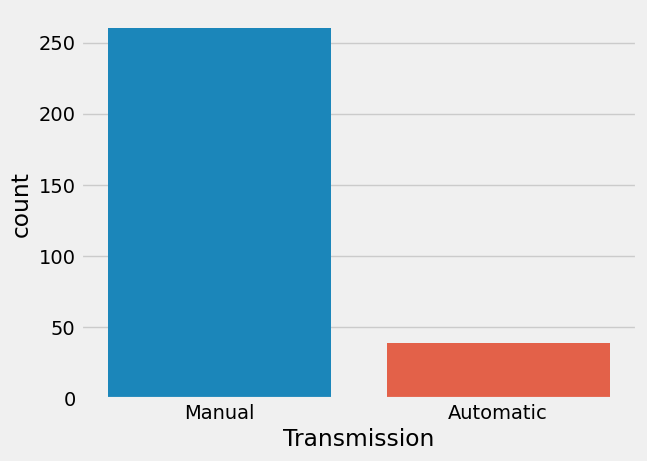

In [15]:
sns.countplot(x = "Transmission", data = df)

### Research Question 4 (  What are the ten most expensive cars? )

In [16]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
seldf = df.nlargest(10, "Selling_Price").sort_values(by = "Selling_Price")
seldf

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
66,innova,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0


<BarContainer object of 10 artists>

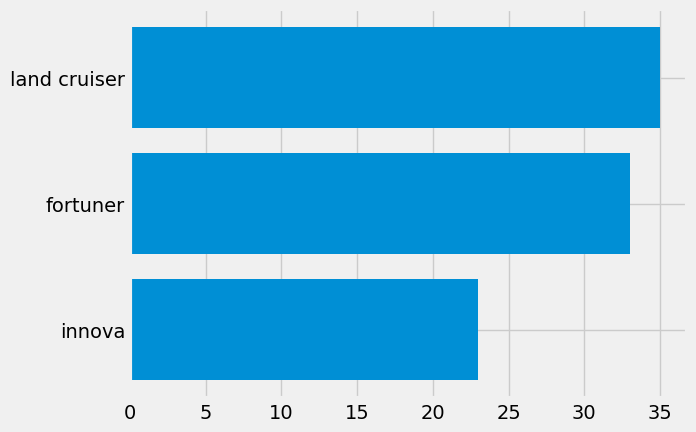

In [18]:
plt.barh(seldf["Car_Name"], seldf["Selling_Price"])

### Research Question 5 ( What are the most ten cars per kilometer? )

In [19]:
kmsdf = df.nlargest(10, "Kms_Driven").sort_values(by = "Kms_Driven")
kmsdf

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
54,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0
200,Bajaj Pulsar 150,2006,0.10,0.75,92233,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


<BarContainer object of 10 artists>

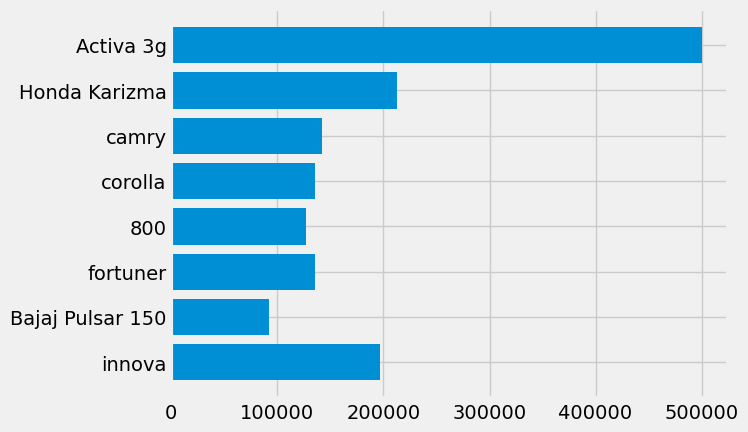

In [20]:
plt.barh(kmsdf["Car_Name"], kmsdf["Kms_Driven"])

### Research Question 6 ( What types of Fuel have the most sales? )

In [21]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

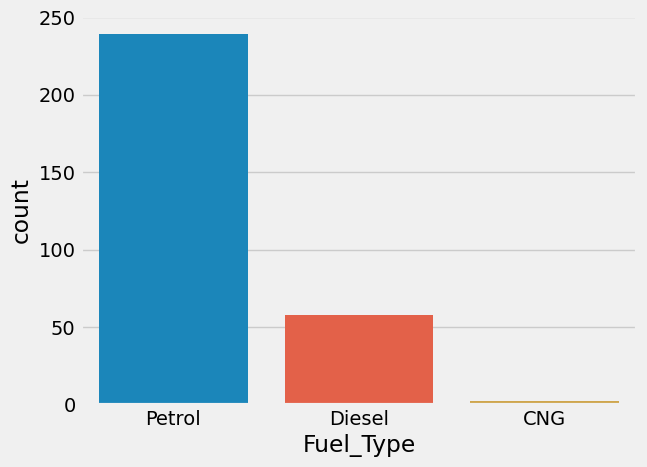

In [22]:
sns.countplot(x = "Fuel_Type", data = df)

### Pre-processing For Machine Learning

In [23]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [24]:
# dropping "Car_Name" column as only numerical columns as are allowed:
df.drop(columns = 'Car_Name', inplace = True)

In [25]:
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [26]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [27]:
df[df["Fuel_Type"] == "CNG"]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


In [28]:
# dropping the "CNG" fuel type as we don't need it: 
df.drop(index = 18, inplace = True)
df.drop(index = 35, inplace = True)

In [29]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     58
Name: Fuel_Type, dtype: int64

In [30]:
# converting the "Fuel_Type" column from categorical type to numerical type,(Diesel= 0),(Petrol= 1) 

dummy1 = pd.get_dummies(df["Fuel_Type"])

dummy1.head(1)

,Diesel,Petrol
0,0,1


In [31]:
df["Seller_Type"].value_counts()

Dealer        191
Individual    106
Name: Seller_Type, dtype: int64

In [32]:
# converting the "Seller_Type" column from categorical type to numerical type,(Individual= 0),(Dealer= 1) 
dummy2 = pd.get_dummies(df["Seller_Type"])

dummy2.head(1)

,Dealer,Individual
0,1,0


In [33]:
df["Transmission"].value_counts()

Manual       258
Automatic     39
Name: Transmission, dtype: int64

In [34]:
# converting the "Transmission" column from categorical type to numerical type,(Automatic= 0),(Manual= 1) 
dummy3 = pd.get_dummies(df["Transmission"])

dummy3.head(1)

,Automatic,Manual
0,0,1


In [35]:
# creating a new DataFrame containing our new columns:

newdf = pd.concat((df,dummy1, dummy2, dummy3), axis = 1)

newdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1,0,0,1


In [36]:
# droping old and duplicated columns:
newdf = newdf.drop(columns =["Fuel_Type", "Seller_Type", "Transmission", "Diesel", "Dealer", "Automatic"])

newdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Petrol,Individual,Manual
0,2014,3.35,5.59,27000,0,1,0,1
1,2013,4.75,9.54,43000,0,0,0,1
2,2017,7.25,9.85,6900,0,1,0,1
3,2011,2.85,4.15,5200,0,1,0,1
4,2014,4.60,6.87,42450,0,0,0,1


In [37]:
# Renaming our new columns:

newdf = newdf.rename(columns = {"Petrol":"Fuel_Type", "Individual":"Seller_Type", "Manual": "Transmission_Type"})


### Below we will create a model to try predict the present price for cars

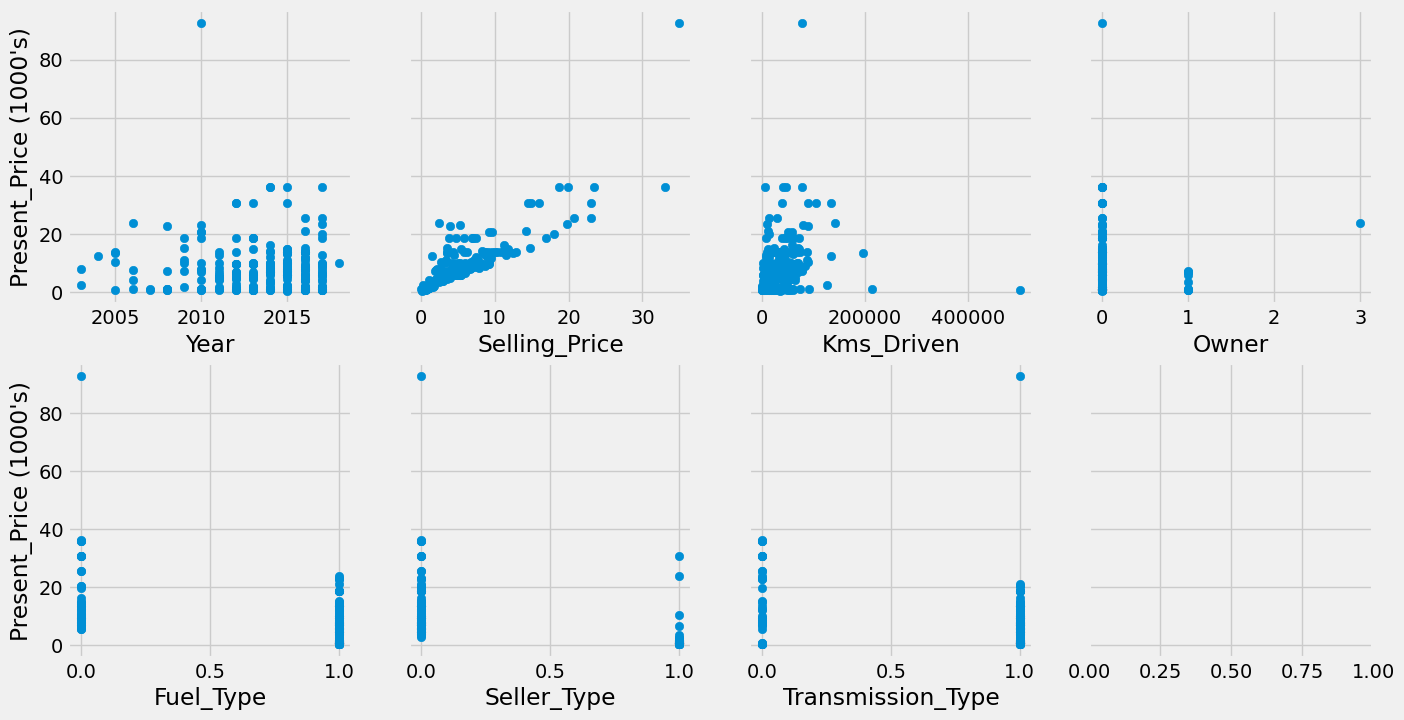

In [38]:
# Understanding the relation berween each feature and the present price:

fig, ax = plt.subplots(2, 4, sharey = "all",figsize=(15,8))

ax[0,0].set_ylabel("Present_Price (1000's)")
ax[0,0].set_xlabel("Year")
ax[0,0].scatter(newdf["Year"], newdf["Present_Price"])

ax[0,1].set_xlabel("Selling_Price")
ax[0,1].scatter(newdf["Selling_Price"], newdf["Present_Price"])

ax[0,2].set_xlabel("Kms_Driven")
ax[0,2].scatter(newdf["Kms_Driven"], newdf["Present_Price"])

ax[0,3].set_xlabel("Owner")
ax[0,3].scatter(newdf["Owner"], newdf["Present_Price"])

ax[1,0].set_xlabel("Fuel_Type")
ax[1,0].set_ylabel("Present_Price (1000's)")
ax[1,0].scatter(newdf["Fuel_Type"],newdf["Present_Price"])

ax[1,1].set_xlabel("Seller_Type")
ax[1,1].scatter(newdf["Seller_Type"], newdf["Present_Price"])

ax[1,2].set_xlabel("Transmission_Type")
ax[1,2].scatter(newdf["Transmission_Type"], newdf["Present_Price"])




### Creating our "X" and "Y" variables

In [39]:
newdf.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type', 'Seller_Type', 'Transmission_Type'],
      dtype='object')

In [40]:
# dropping columns that we think does not have much effect to present price:

x = newdf.drop(["Present_Price","Fuel_Type","Transmission_Type"], axis = 1)

y = newdf["Present_Price"]

print(x)
print(y)

     Year  Selling_Price  Kms_Driven  Owner  Seller_Type
0    2014           3.35       27000      0            0
1    2013           4.75       43000      0            0
2    2017           7.25        6900      0            0
3    2011           2.85        5200      0            0
4    2014           4.60       42450      0            0
..    ...            ...         ...    ...          ...
296  2016           9.50       33988      0            0
297  2015           4.00       60000      0            0
298  2009           3.35       87934      0            0
299  2017          11.50        9000      0            0
300  2016           5.30        5464      0            0

[297 rows x 5 columns]
0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 297, dtype: float64


In [41]:
print(x.shape)
print(y.shape)

(297, 5)
(297,)


### Splitting our data 

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(237, 5) (60, 5)
(237,) (60,)


### Training our model

In [43]:
regressor = XGBRegressor()

regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Predicting on training data

In [44]:
train_pred = regressor.predict(x_train)

In [45]:
# Evaluatig our model prediction on train data:


mae = metrics.mean_absolute_error(y_train, train_pred)
mse = metrics.mean_squared_error(y_train, train_pred)
r2 = metrics.r2_score(y_train, train_pred)

print(mae)
print(mse)
print(r2)

0.016957333977212392
0.0008347465473421695
0.9999900409620602


Text(0, 0.5, 'Predicted Train Data Values')

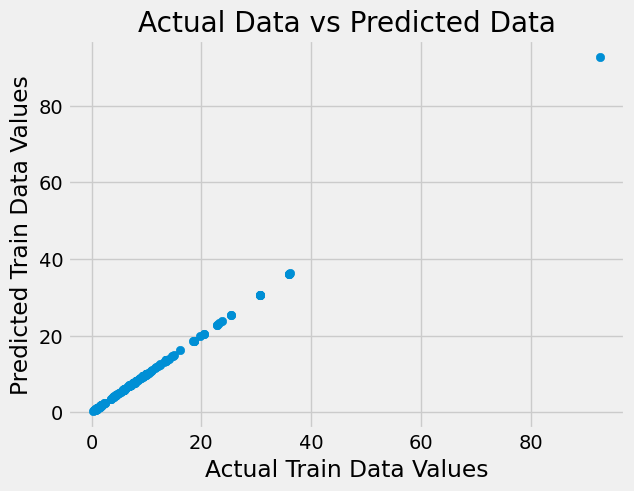

In [46]:
plt.scatter(y_train, train_pred)

plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Train Data Values")
plt.ylabel("Predicted Train Data Values")

### Predicting on test data

In [47]:
test_pred = regressor.predict(x_test)

In [48]:
# Evaluatig our model prediction on test data:

mae1 = metrics.mean_absolute_error(y_test, test_pred)
mse1 = metrics.mean_squared_error(y_test, test_pred)
r2_1 = metrics.r2_score(y_test, test_pred)

print(mae1)
print(mse1)
print(r2_1)

0.8509538497726121
2.7767002359898774
0.9063696407708315


Text(0, 0.5, 'Predicted test Data Values')

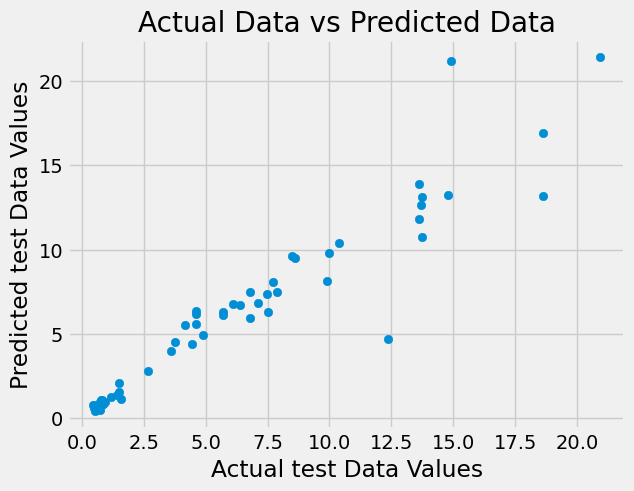

In [49]:
plt.scatter(y_test, test_pred)

plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual test Data Values")
plt.ylabel("Predicted test Data Values")

In [50]:
# craetin a DataFrame shows actual values as well as predicted values:

pred_df = pd.DataFrame({"Actual_Values": y_test.squeeze(), "Predicted_Values": test_pred.squeeze()})

print(pred_df)

     Actual_Values  Predicted_Values
183          0.470          0.800058
275         13.600         13.910053
229          6.790          5.960958
7            8.610          9.504377
177          0.570          0.758654
32           7.490          7.344410
187          0.510          0.628953
185          0.580          0.624523
274          6.800          7.509026
145          0.810          1.107585
13           7.710          8.088489
234          5.700          6.278438
38           3.760          4.523189
273          7.500          6.305186
80          14.890         21.171263
241          7.130          6.828870
210          4.600          6.164583
98          18.610         16.903318
95          18.610         13.158515
291          6.100          6.793396
3            4.150          5.556956
108          1.500          1.545735
31           4.890          4.940104
174          0.720          0.794671
138          0.870          0.869776
44           2.690          2.832856
2